**COMP3670/6670 Tutorial Week 10**
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Task 0: MNIST Dataset (Recap)

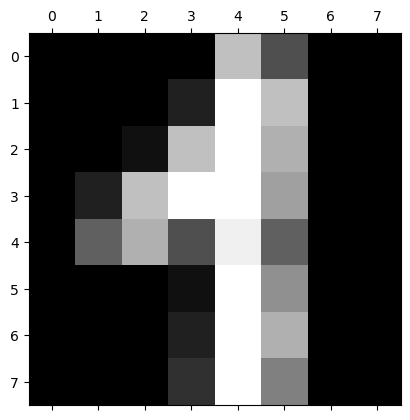

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits,labels = datasets.load_digits(return_X_y=True)
X = digits
y = labels

def print_heatmap(data, l=8, h=8):
    plt.matshow(data.reshape(l,h), cmap=plt.cm.gray)

print_heatmap(X[42]) #print digits


In [4]:
TEST_SIZE = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=TEST_SIZE)

print("Total dataset", np.shape(X))
print("Split dataset (Train)", np.shape(X_train))
print("Split dataset (Test)", np.shape(X_test))

Total dataset (1797, 64)
Split dataset (Train) (898, 64)
Split dataset (Test) (899, 64)


# MLP

In [5]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

#The MLP input layer has 64 pixel inputs (8x8 image). The output layer predicts 10 labels. 
#Hidden layers form connected perceptron between input and output layers.
#(64,32) denotes a first layer with 64 perceptrons connected to the input layer, 
#then another hidden layer with 32 perceptrons connected to the first hidden layer
#and to the output layer. How do these choices matter? 
# hidden_layers = (64,32)
hidden_layers = (64,)
max_iterations = 10
#Max iterations is set to 10. Can you set it higher? Will a higher value ensure every iteration is used?

mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=max_iterations, activation = 'logistic', random_state=42, verbose=1)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train) #Code to catch convergence warnings

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Iteration 1, loss = 2.32553814
Iteration 2, loss = 2.13760250
Iteration 3, loss = 2.00424110
Iteration 4, loss = 1.89045962
Iteration 5, loss = 1.77778621
Iteration 6, loss = 1.67032034
Iteration 7, loss = 1.57105427
Iteration 8, loss = 1.47740961
Iteration 9, loss = 1.38970631
Iteration 10, loss = 1.30880741
Training set score: 0.844098
Test set score: 0.779755


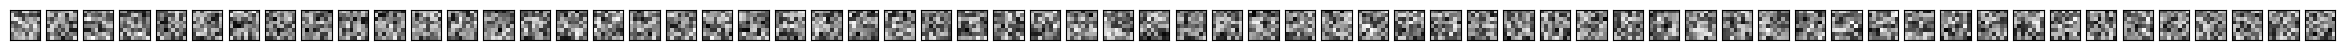

In [6]:
#Visualising hidden layer weights
import math
for i, layer in enumerate(hidden_layers):
    fig, axes = plt.subplots(1, layer, figsize=(30, 10))
    vmin, vmax = mlp.coefs_[i].min(), mlp.coefs_[i].max()
    for coef, ax in zip(mlp.coefs_[i].T, axes.ravel()):
        #display square subset
        mat_side = math.floor(math.sqrt(len(coef)))
        #For visualising only showing the largest square matrix the weights represent
        ax.matshow(coef[:mat_side*mat_side].reshape(mat_side, mat_side), cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
        ax.set_xticks(())
        ax.set_yticks(())
    
plt.show()

# Task: Test score vs max iterations

In [8]:
#Can you try the same MLP with different max_iterations up to 1000? 
# What is the test score mlp.score(X_test, y_test)?
#Try to plot this
mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1, activation = 'logistic', random_state=42, verbose=1)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train) #Code to catch convergence warnings

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 2.32553814
Training set score: 0.198218
Test set score: 0.180200


# Task: Test score vs architecture

In [9]:
#For this task set the maximum iterations to be 1000.
#Is there a 'best' architecture? 
#What about wider networks (62) or (128)?
#What about deeper networks (64,64) or (64,32) or (32,32,32)?
#Can you check the test score for different architectures?
# Define a list of architectures to try
hidden_layer_architectures = [
    (62,),           # Wider
    (128,),          # Wider
    (64, 64),        # Deeper
    (64, 32),        # Deeper
    (32, 32, 32),    # Even deeper
]
# Maximum iterations
max_iterations = 1000

# Initialize variables to store the results
results = []

# Loop through each architecture and evaluate the MLPClassifier
for architecture in hidden_layer_architectures:
    print(f"Testing architecture: {architecture}")
    
    mlp = MLPClassifier(hidden_layer_sizes=architecture, 
                        max_iter=max_iterations, 
                        activation='logistic', 
                        random_state=42, 
                        verbose=False)

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        mlp.fit(X_train, y_train)

    train_score = mlp.score(X_train, y_train)
    test_score = mlp.score(X_test, y_test)

    # Store the results
    results.append((architecture, train_score, test_score))

    print(f"Training set score: {train_score}")
    print(f"Test set score: {test_score}")

# Display the results
print("\nResults:")
for architecture, train_score, test_score in results:
    print(f"Architecture: {architecture}, Training Score: {train_score}, Test Score: {test_score}")


Testing architecture: (62,)
Training set score: 1.0
Test set score: 0.9699666295884316
Testing architecture: (128,)
Training set score: 1.0
Test set score: 0.9699666295884316
Testing architecture: (64, 64)
Training set score: 1.0
Test set score: 0.9610678531701891
Testing architecture: (64, 32)
Training set score: 1.0
Test set score: 0.9588431590656284
Testing architecture: (32, 32, 32)
Training set score: 1.0
Test set score: 0.9365962180200222

Results:
Architecture: (62,), Training Score: 1.0, Test Score: 0.9699666295884316
Architecture: (128,), Training Score: 1.0, Test Score: 0.9699666295884316
Architecture: (64, 64), Training Score: 1.0, Test Score: 0.9610678531701891
Architecture: (64, 32), Training Score: 1.0, Test Score: 0.9588431590656284
Architecture: (32, 32, 32), Training Score: 1.0, Test Score: 0.9365962180200222


# Probabilities of Detections

In [10]:
def plot_detection_probabilities(entry):
    probabilities = mlp.predict_proba([entry])[0]
    print(np.sum(probabilities)) #What do you think this should be? 
    plt.bar(np.arange(10), probabilities, color='k')
    plt.xticks(np.arange(10))
    plt.ylabel("probability")
    plt.xlabel("digit labels")
    plt.show()


0.9999999999999997


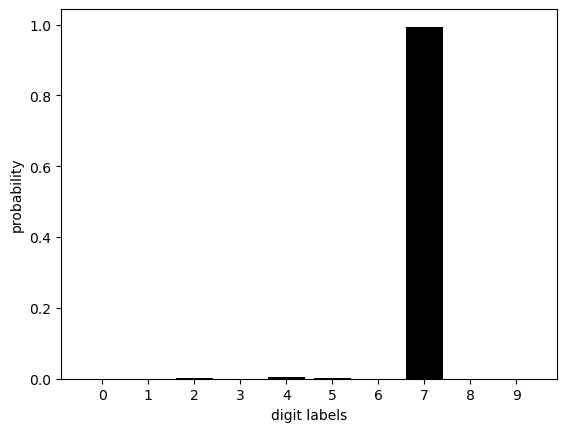

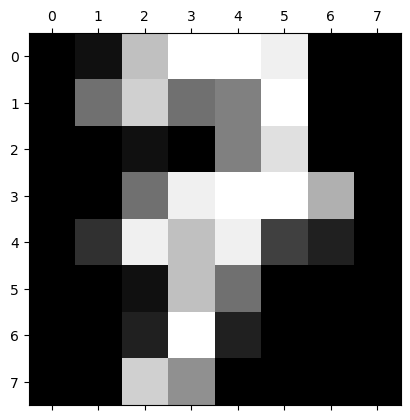

In [11]:
plot_detection_probabilities(X_test[42])
print_heatmap(X_test[42])

# Task: High confidence vs low confidence classifications

In [ ]:
#Try different entries from the test set to see if you can find a low confidence example
#What would such an example look like in the probability distribution plot?